# Install pipenv

**`pipx install pipenv`**

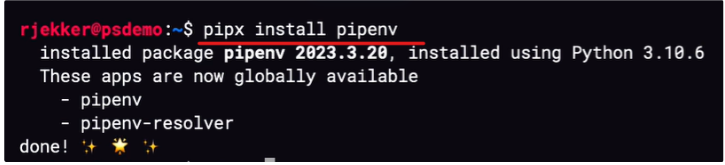

# Installing dependencies using pipenv

**`pipenv install arrow`**

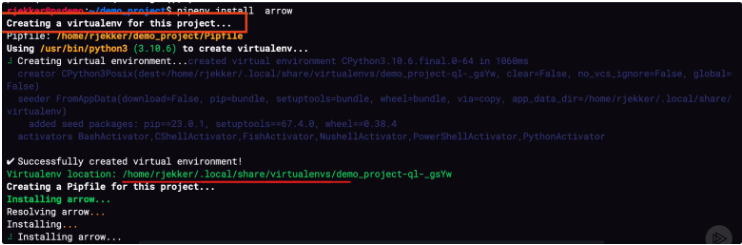

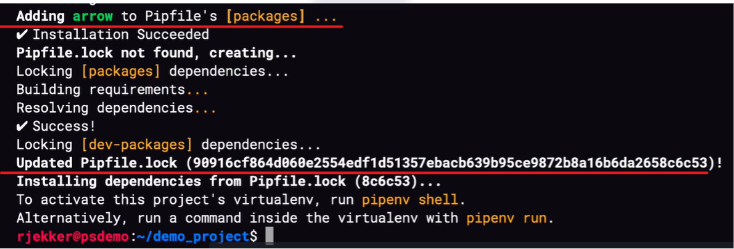

When we install dependencies it does multiple things:

* It creates a virtual environment in a separate folder called **.vitualenvs** with a unique name bound to this folder. 
So that pipenv will know later that the virtual environment belongs to which project. This means that, if we move or rename the project then pipenv will not be able to find this project environment that it has created.

* It also install the dependencies in the environment and creates two files:
    * **Pipfile**
    * **Pipfile.lock**

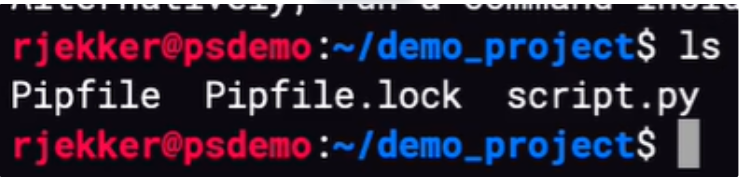


## Pipfile

The `pipfile` is in the `toml` file format just like `pyproject.toml` and it has sections with square brackets.

 It starts with a source block which tells pipenv the package repository to use.

In the packages section, we see our dependency arrow, and because we haven’t specified any version while installing. 

That’s why, it has “`*`” in the place of version which means any version will do.

The **dev-packages** section for development-specific dependencies.

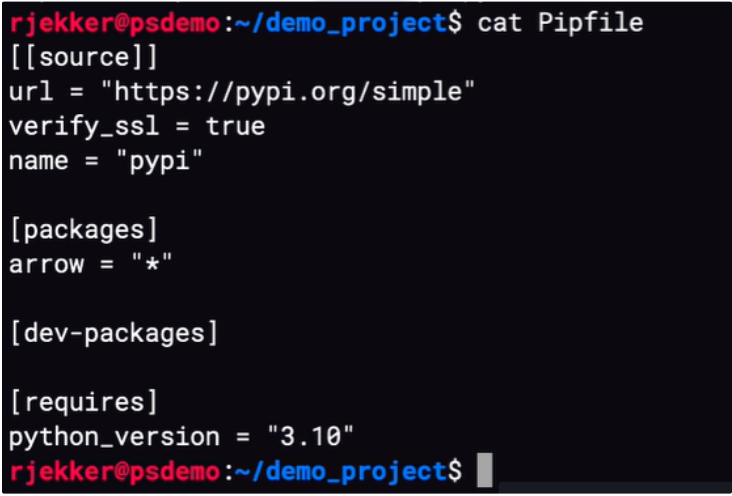

# Pipfile.lock

This is where pipenv stores the exact versions of every single package installed including the sub-dependencies.

So this is what `pipenv` uses to make the dependency tree deterministics.

So the **`Pipfile`** contains abstract dependencies, and the **`Pipfile.lock`** contains all the detailed versions of all sub-dependencies.

Editing **`Pipfile`** is okay but the **`Pipfile.lock`** should only be managed by `pipenv`.

Whenever we install a new package using `pipenv`, the new package will gets added to **`Pipfile`**, but `pipenv` also generates a completely new **`Pipfile.lock`** file.

> **NOTE:**
> * *Everytime we install something new, the entire dependency tree is generated and stored in the lock file because there are might be different version needed for some sub-dependencies. And just like pip, resolving an entire dependency tree and locking process with pipenv can take quite some time.*
> * *Even if you install something with no sub-dependencies and shouldn’t change the rest of the tree, but still pipenv resolve the entire dependency tree again and generates the lock file.*
> * *This is one of the criticism pipenv gets a lot.*

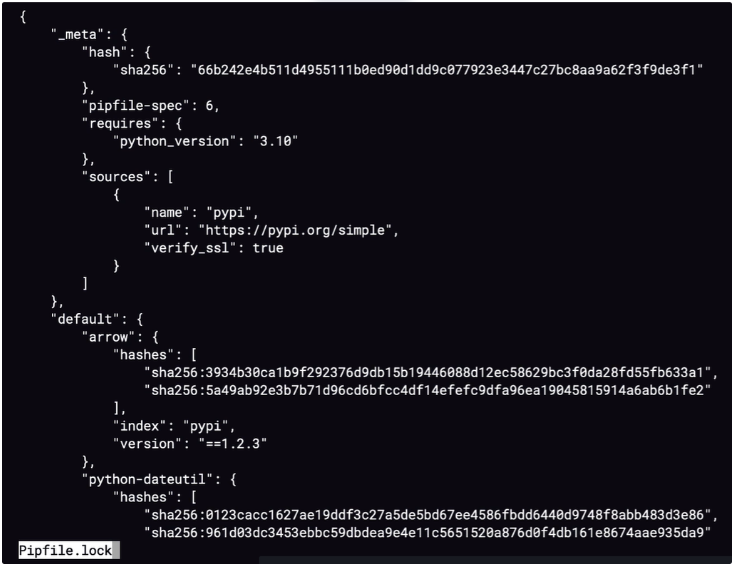

# Pipenv workflow

Now we’ll look at the typical workflow of using `pipenv`.

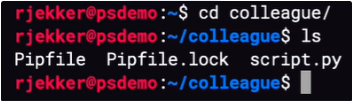

Consider you’ve cloned a python project from Git Hub which contains both `pipfile` and `pipfile.lock`. 

Note that the project doesn’t have a virtual environment yet.

Now run → `pipenv sync`. 
* This will install everything from the lock file. 
* Now we have the required packages installed.

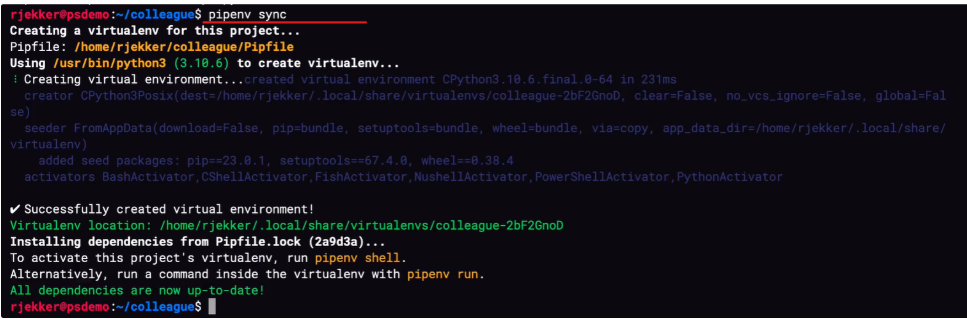

 Now run → `pipenv graph`, to check the entire dependency tree along with the dependencies as well as their sub-dependencies, version specifiers and the installed versions.

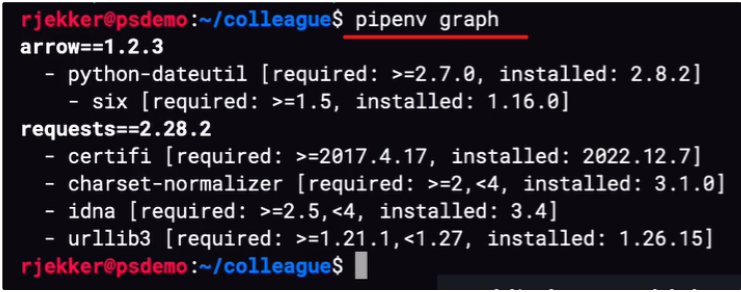

If we check the `pipfile` we'll find that the package/dependency called **black** has not been installed as per the dependency tree shown above.

The reason for **black** dependency not getting installed is that **black** has been listed as a development dependency.

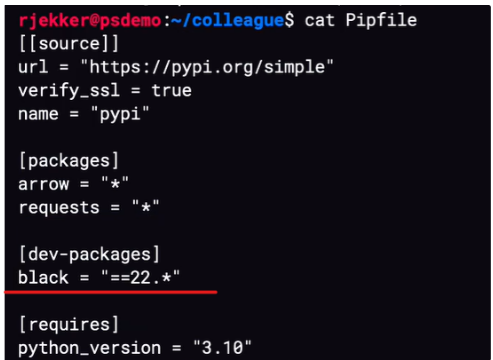

To install development dependencies use the `-d` switch with `pipenv sync` command as follow → `pipenv sync -d`

The `-d` switch tells `pipenv` to install all development dependencies as well as the default dependencies.

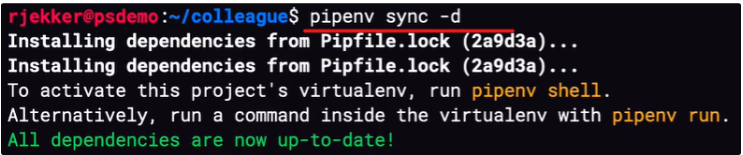

Now we cannot run black right now as we’re not in the active environment.

To run things with `pipenv` from outside the virtual environment, we have the following options:
```
pipenv run black script.py    # here we're running black against the script.py
pipenv run python script.py    # To run the script.py itself
```

Or, we can start a shell with the active environment using `pipenv shell` and now we can run things just like in any other environment.
```
pipenv shell
python script.py
```

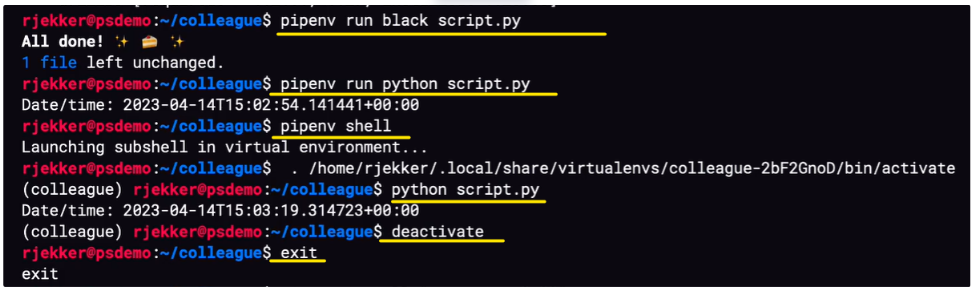

Now sometimes we have a tool that doesn’t understand the **pipfile** but it does understand the `requirements.txt` file.

The `pipenv` also allows to create of a `requirement.txt` for such scenarios → `pipenv requirements`

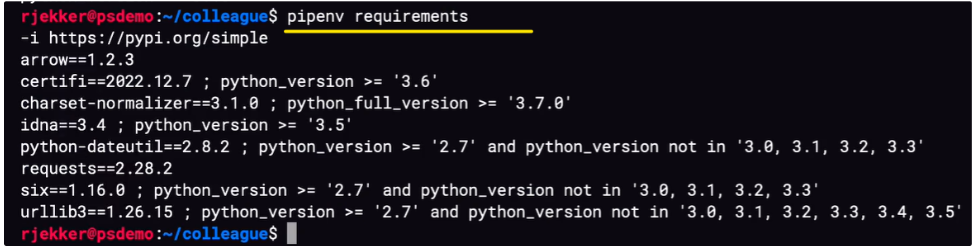

And in case, you need development requirements too, you can add `--dev` switch.

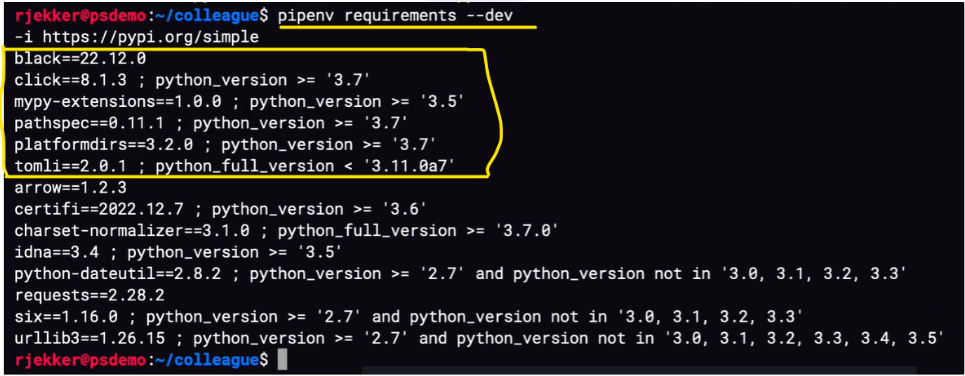

# Pipenv: Keeping packages upto date

The pipenv also offers a way to keep our packages up to date. Also, pipenv can run security checks for the packages.

For example, let's say we have an older version of `Flask` with some security problems, and one of its dependencies called `Werkzeug`, also has an older version with some vulnerabilities on its own.
```
pipenv check      # To run security scan on installed dependencies
```
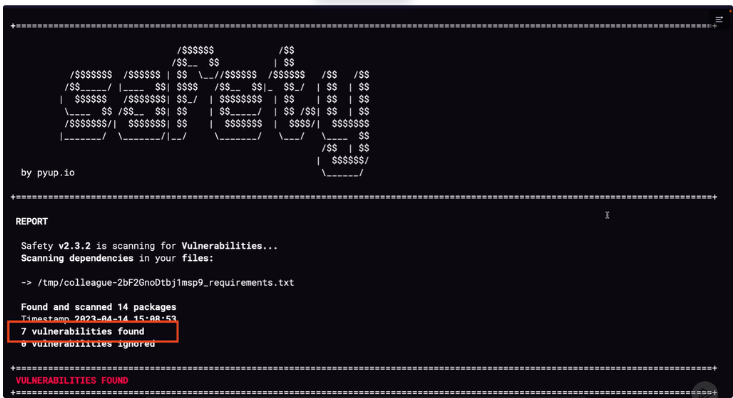

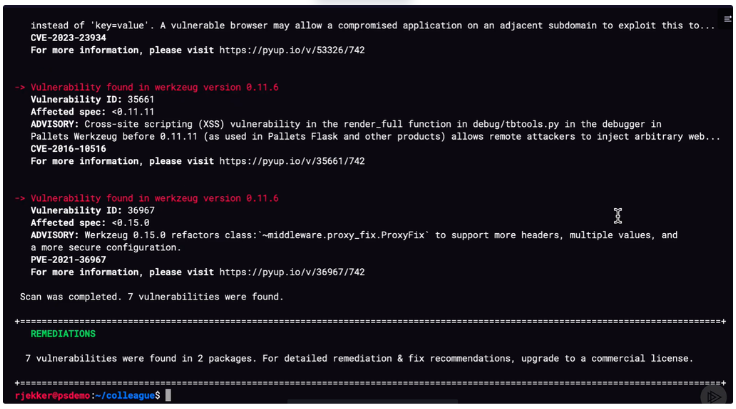

By looking at the `pipfile`, we found that only `Flask` dependency is there and `Werkzeug` is just a sub-dependency.

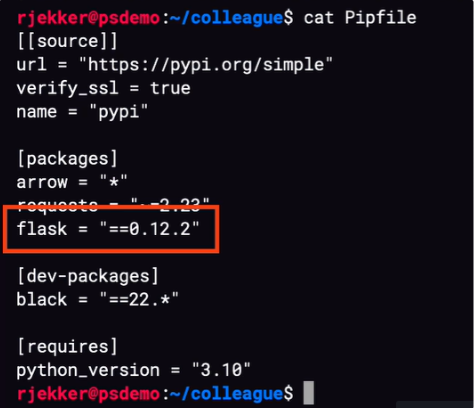

So we’ll just update the `Flask` dependency and install the latest version of `Flask` and its sub-dependencies, which will fix the problem with both `Flask` & `Werkzeug`.
```
pipenv update flask
```

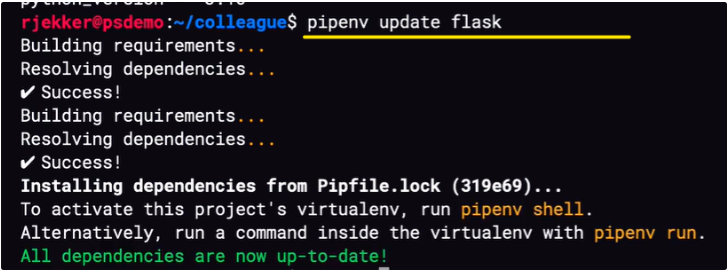

To update everything, that is all dependencies and sub-dependencies, run
```
pipenv update       # This will udpate all top-level and sub-dependencies
```

# Review: pipenv

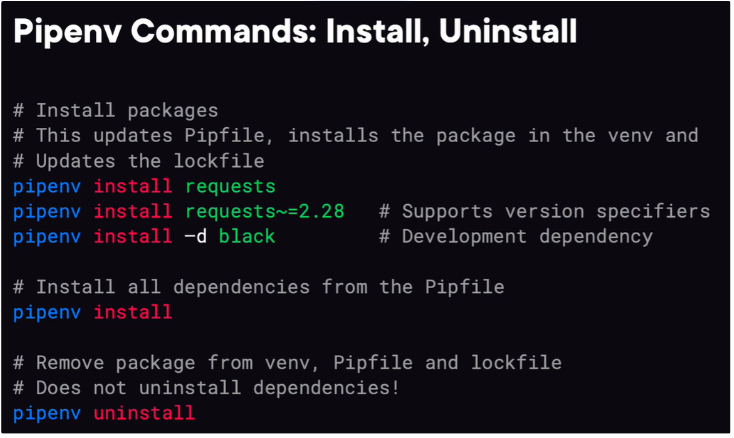

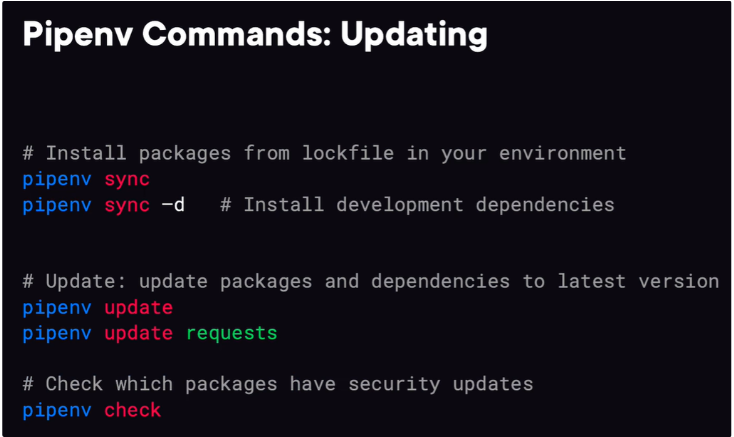

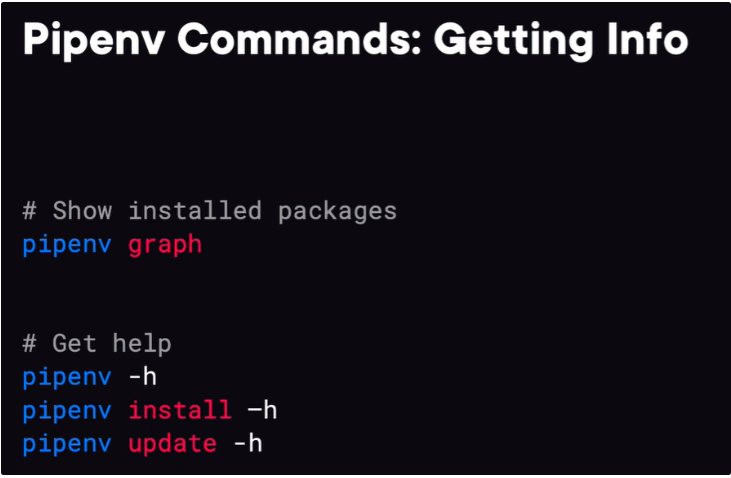

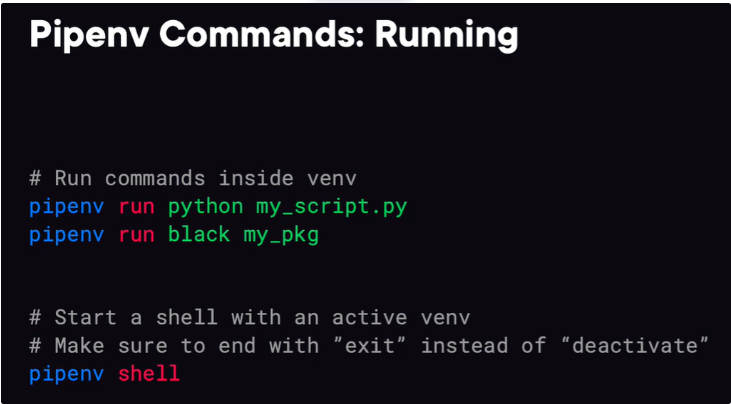